<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-площади,-цены,-этажности-и-высоты-потолков" data-toc-modified-id="Анализ-площади,-цены,-этажности-и-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ площади, цены, этажности и высоты потолков</a></span></li><li><span><a href="#Анализ-продолжительности-продажи" data-toc-modified-id="Анализ-продолжительности-продажи-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ продолжительности продажи</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость" data-toc-modified-id="Факторы,-влияющие-на-стоимость-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость</a></span></li><li><span><a href="#Рейтинг-населенных-пунктов" data-toc-modified-id="Рейтинг-населенных-пунктов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Рейтинг населенных пунктов</a></span></li><li><span><a href="#Анализ-границы-ЦАО" data-toc-modified-id="Анализ-границы-ЦАО-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ границы ЦАО</a></span></li><li><span><a href="#Анализ-рынка-ЦАО" data-toc-modified-id="Анализ-рынка-ЦАО-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ рынка ЦАО</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [797]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#print(df.head())
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,2775,...,21421.000000,12180.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,...,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,...,10.569807,1.150082,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,...,5.905438,1.071300,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,...,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,...,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,...,9.100000,1.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,...,12.000000,2.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000


**Вывод**

Таблица содержит 22 характеристики объявлений. Ниже основные моменты, на которые стоит обратить внимание в предобработке:<br>
<br>
*Содержат пропуски:*
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- days_exposition   
   
*Имеют некорректный тип данных:*
- first_day_exposition. ожидаемый формат - date. дата публикации
- floors_total. ожидаемый формат - int64. количество этажей в доме должно быть целочисленным
- is_apartment. ожидаемый формат - bool. принимает значения булева типа.
- balcony. ожидаемый формат - int64. количество балконов в доме должно быть целочисленным
- parks_around3000. ожидаемый формат - int64. количество парков должно быть целочисленным
- ponds_around3000. ожидаемый формат - int64. количество прудов должно быть целочисленным
- days_exposition. ожидаемый формат - int64. количество прудов должно быть целочисленным

## Предобработка данных

### Обработка пропусков

Начнем разбор каждого из параметров с пропусками.   
**ceiling_height**

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

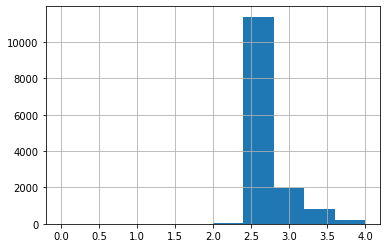

In [798]:
df['ceiling_height'].hist(bins=10, range=(0,4))
df['ceiling_height'].describe()

Высота потолков (ожидаемо) имеет не сильный разброс и сосредоточена возле медианы.    
Пропуски можно заменить на медиану. Произведем замену и проверем полученный результат.

In [799]:
ceiling_height_med = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_med)

**floors_total**

In [800]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Данные отсутствуют всего для 56 объявлений. Взглянем на них подробнее.

In [801]:
display(df.query('floors_total != floors_total').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Заменим пропуски по следующей логике:
- если этаж объекта <= медианы, то меняем на медиану
- если больше, то предполагаем, что указанный этаж является последним, и общая этажность равна параметру floor.

In [802]:
floors_total_median = df['floors_total'].median()
for index in range(len(df)):
    if math.isnan(df['floors_total'][index]):
        df['floors_total'][index] = max(floors_total_median, df['floor'][index])

**living_area**

In [803]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Данные по жилплощади отсутствуют почти для 2000 наблюдений, что составляет почти 10% выборки. От такого кол-ва наблюдений мы отказаться не можем, так как параметр критичен для анализа. Пропуски будем заменять на значения площадей в схожих группах.   
Среди характеристик есть поле - total area. Логично предположить, что есть прямая зависимость между общей и жилой площадью. Проверим это на графике.

0.9395373338721491


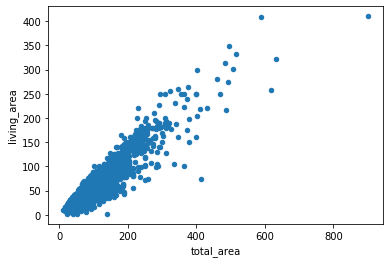

In [804]:
df.plot(x='total_area', y='living_area', kind='scatter')
print(df['total_area'].corr(df['living_area']))

График и коэффициент корреляции подтверждают гипотезу о высокой взаимосвязи параметров. Рассчитаем новый параметр - долю жилой площади в общей (share_living_total) и проанализируем распределение получившейся величины.

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
Name: share_living_total, dtype: float64

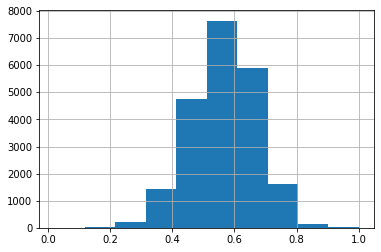

In [805]:
df['share_living_total'] = df['living_area'] / df['total_area']
df['share_living_total'].hist()
df['share_living_total'].describe()

Медиана и среднее практически равны. Заменим пропуски в столбце living_area на total_area * share_living_total.median()

In [806]:
df['living_area_calc'] = df['share_living_total'].median() * df['total_area']
for index in range(len(df)):
    if math.isnan(df['living_area'][index]) == True:
        df['living_area'][index] = df['living_area_calc'][index]
df = df.drop('living_area_calc',1)
df = df.drop('share_living_total',1)

**is_apartment**   
Переменная отвечает за признак апартаментов. взглянем на нее чуть подробнее.

In [807]:
print(df['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


Характеристика заполнена лишь для 2775 наблюдений. Поскольку нет явных признаков, указывающих на тип недвижимости и параметр не критичен для дальнейшего анализа, заменим пропуски на параметр "False", сохраняя булеву логику переменной.

In [808]:
df['is_apartment'] = df['is_apartment'].fillna('False')

**kitchen_area**   
Заменим пропуски по аналогии с расчетом living_area. Посчитаем долю kitchen_area в total_area, выведем медиану и досчитаем пропуски умножением total_area на получившийся коэффициент.

In [809]:
df['share_kitchen_total'] = df['kitchen_area'] / df['total_area']
df['share_kitchen_total'].describe()

df['kitchen_area_calc'] = df['share_kitchen_total'].median() * df['total_area']
for index in range(len(df)):
    if math.isnan(df['kitchen_area'][index]) == True:
        df['kitchen_area'][index] = df['kitchen_area_calc'][index]
df = df.drop('kitchen_area_calc',1)
df = df.drop('share_kitchen_total',1)

**balcony**   
Данные о балконах отсутствуют практически для половины объявлений.   
Предположим, если данные о балконе не указаны, то балкона и нет, т.е. заменим пропуски на 0.

In [810]:
df['balcony'] = df['balcony'].fillna(0)

**locality_name**   
Данные о населенном пункте не указаны для 48 наблюдений, что составляет 0,002% выборки. Взглянем на них подробнее.

In [811]:
display(df.query('locality_name != locality_name').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Поскольку нет явных признаков населенного пункта, заменим пропуски на параметр "Unknown"

In [812]:
df['locality_name'] = df['locality_name'].fillna('Unknown')

Поскольку данное поле является единственным текстовым параметром, необходимо:
1. заменить все буквы ё на е
2. убрать из названия географические признаки (поселок, село, прочее).
3. привести все названия к единому регистру 

In [813]:
#заменяем ё на е
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
display(df['locality_name'].value_counts().head())

Санкт-Петербург    15721
поселок Мурино       556
поселок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

Как можно заметить все слова в поле, кроме названия населенного пункта, начинаются со строчной буквы. Разобьем поле на слова и оставим в названии только слова с заглавными буквами.

In [814]:
#разобьем название на списки
df['locality_name_split'] = df['locality_name'].str.split(' ')
for index in range(len(df)):
    df['locality_name_split'][index] = list(filter(lambda item: item[0].isupper() == True, df['locality_name_split'][index]))
    df['locality_name'][index] = ''.join(df['locality_name_split'][index])

#приведем к единому регистру
df['locality_name'] = df['locality_name'].str.lower()

#удалим вспомогательный столбец
df = df.drop('locality_name_split',1)

display(df['locality_name'].value_counts().head())

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
Name: locality_name, dtype: int64

**airports_nearest**   
Данный параметр указывает расстояние до ближайшего аэропорта. Для 5000 объявлений данный параметр отсутствует. Взглянем на них подробнее.

In [815]:
df_nan_airports = df.query('airports_nearest != airports_nearest')
display(df_nan_airports.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26,False,...,8.810000,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.000000,5,False,...,9.000000,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,False,...,11.000000,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,18.625805,2,False,...,5.655172,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Напротив каждого пропуска мы имеем название населенного пункта. Посчитаем медианное значение удаленности от аэропорта для каждого из них.

In [816]:
df_pivot_airports = df.pivot_table(index='locality_name', values='airports_nearest', aggfunc='median')
display(df_pivot_airports.head())

,airports_nearest
locality_name,
unknown,22041.0
александровская,12896.5
белоостров,57769.0
зеленогорск,72282.0
колпино,26232.0


Заменим пропуски на медианные значения.

In [817]:
for index in range(len(df)):
    if math.isnan(df['airports_nearest'][index]):
        try:
            df['airports_nearest'][index] = df_pivot_airports.loc[df['locality_name'][index]].sum()
        except:
            df['airports_nearest'][index] = 0

**cityCenters_nearest**   
По аналогии с удаленностью от аэропорта заменим пропуски на медианные значения.

In [818]:
df_pivot_centers = df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='median')

In [819]:
for index in range(len(df)):
    if math.isnan(df['cityCenters_nearest'][index]):
        try:
            df['cityCenters_nearest'][index] = df_pivot_centers.loc[df['locality_name'][index]].sum()
        except:
            df['cityCenters_nearest'][index] = 0

**parks_nearest**   
Данный параметр указывает расстояние до ближайшего парка. Взглянем на объявления с пропущенным значением, а также на распределение значений parks_around3000 внутри выбранного датасета.

In [820]:
df_nan_parks = df.query('parks_nearest != parks_nearest')
print(df_nan_parks['parks_around3000'].value_counts())

0.0    10102
Name: parks_around3000, dtype: int64


Во всех объявлениях, где не указано расстояние до ближайшего парка, отсутствует маркер parks_around3000, что свидетельствует об отсутствии парка в пределах 3км. Заменим пропуски на 0, предполагая, что расстояние в 0 значит отсутствие парка.

In [821]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)

**parks_around3000**   
Предположим, что если не указано значение для параметра, то парков рядом нет и значение должно равняться нулю (см.пункт выше).

In [822]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

**ponds_around3000**   
Взглянем на распределение кол-ва прудов, где не указан параметр расстояние до ближайшего.

In [823]:
print(df.query('ponds_around3000 != ponds_around3000')['ponds_nearest'].value_counts())

Series([], Name: ponds_nearest, dtype: int64)


Можно заметить, что для всех таких объявлений значения также пропущены. Заменим пропущенные значения в столбце ponds_around3000 на 0, считая, что если значения не указано, то прудов рядом нет.

In [824]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

**ponds_nearest**   
Проанализируем аналогично parks_nearest.

In [825]:
df_nan_ponds = df.query('ponds_nearest != ponds_nearest')
print(df_nan_parks['ponds_around3000'].value_counts())

0.0    5816
1.0    3143
2.0     848
3.0     295
Name: ponds_around3000, dtype: int64


Для большинства наблюдений, где не указано расстояние до водоема, справедиво и его отсутствие (в виде 0) в показателе ponds_around3000. В этих наблюдениях пропуски в столбце ponds_nearest можно заменить на 0.   
Для остальных случаев проанализируем распределение по группам.

                  ponds_nearest
ponds_around3000               
1.0                       593.0
2.0                       437.0
3.0                       305.0


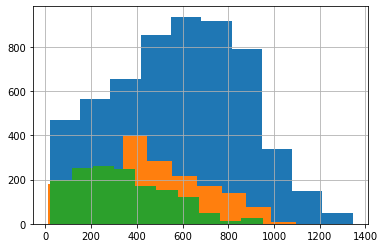

In [826]:
df.query('ponds_around3000 == 1')['ponds_nearest'].hist()
df.query('ponds_around3000 == 2')['ponds_nearest'].hist()
df.query('ponds_around3000 == 3')['ponds_nearest'].hist()
df_pivot_ponds = df.pivot_table(index='ponds_around3000', values='ponds_nearest', aggfunc='median')
print(df_pivot_ponds)

Чем больше водоемов в пределах 3км, тем меньше расстояние до ближайшего (ваш кэп). Возьмем медианные значения по группам для заполнения соответствующих пропусков.

In [827]:
for index in range(len(df)):
    if math.isnan(df['ponds_nearest'][index]) == True:
        if df['ponds_around3000'][index] == 0:
            df['ponds_nearest'][index] = 0
        else:
            df['ponds_nearest'][index] = df_pivot_ponds.loc[df['ponds_nearest'][index]]

**days_exposition**   
У каждого объявления есть дата создания, но для 2305 объявлений отсутствует информация по продолжительности размещения. Поскольку это составляет значительную часть выборки, отказаться от этих данных мы не можем. Заменим пропуски на значение моды данного показателя.

In [828]:
days_mode = df['days_exposition'].mode().sum()
df['days_exposition'] = df['days_exposition'].fillna(days_mode)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around3

### Удаление дубликатов

Оценим кол-во дубликатов

In [829]:
print(df.duplicated().sum())

0


Дубликатов нет => удалять нечего.

### Изменение типов данных

Напомню переменные, для которых мы меняем тип данных:
- first_day_exposition. ожидаемый формат - date. дата публикации
- floors_total. ожидаемый формат - int64. количество этажей в доме должно быть целочисленным
- is_apartment. ожидаемый формат - bool.
- balcony. ожидаемый формат - int64. количество балконов в доме должно быть целочисленным
- parks_around3000. ожидаемый формат - int64. количество парков должно быть целочисленным
- ponds_around3000. ожидаемый формат - int64. количество прудов должно быть целочисленным
- days_exposition. ожидаемый формат - int64. количество прудов должно быть целочисленным

In [830]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['floors_total'] = df['floors_total'].astype('int64')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')
df['days_exposition'] = df['days_exposition'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

**Вывод**   
Все пропуски были заменены или удалены, типы данных приведены в соответствие => можно приступать к расчетам и анализу.
Также хотелось бы адресовать поставщику данных большое количество пропусков по переменным, касающимся географии и типа площади (апартаменты / нет).

## Расчёты и добавление результатов в таблицу

Рассчитаем дополнительные поля:   
- цену за кв.м.
- день недели, месяц, год публикации
- тип этажности (первый / последний / другой)
- доли кухонной и жилой площади.

In [831]:
#расчет стоимости кв.метра
df['price_sq_m'] = df['last_price'] / df['total_area']
#день недели, месяц, год
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

#этаж квартиры
df['floor_type'] = ''
for index in range(len(df)):
    if df['floor'][index] == 1:
        df['floor_type'][index] = 'первый'
    elif df['floor'][index] == df['floors_total'][index]:
        df['floor_type'][index] = 'последний'
    else:
        df['floor_type'][index] = 'другой'

#жилая/общая, кухня/общая        
df['living_total_share'] = df['living_area'] / df['total_area']
df['kitchen_total_share'] = df['kitchen_area'] / df['total_area']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

## Исследовательский анализ данных

### Анализ площади, цены, этажности и высоты потолков

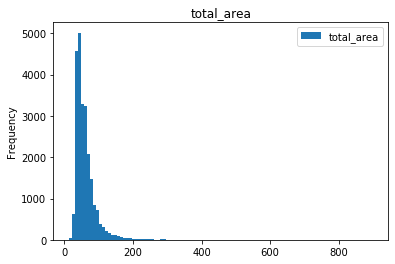

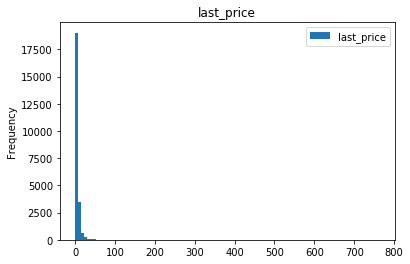

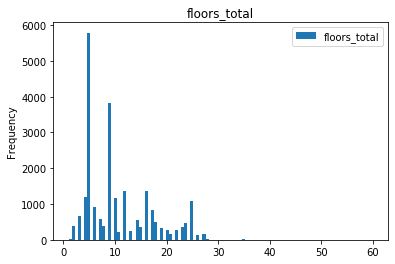

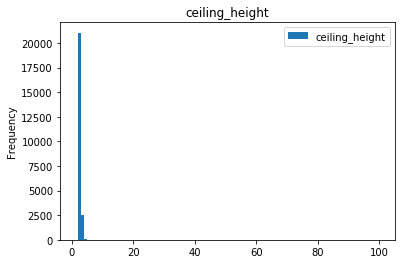

In [832]:
#приведем стоимость к млн.руб для удобства анализа
df['last_price'] = df['last_price'] / 1000000

lst = ['total_area', 'last_price', 'floors_total', 'ceiling_height']
for element in lst:
    df.plot(y=element, kind='hist', bins=100, title=element, range=(min(df[element]),max(df[element])))

Рассмотрим также описательные статистики параметров.

In [833]:
df[['total_area', 'last_price', 'floors_total', 'ceiling_height']].describe()

,total_area,last_price,floors_total,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.348651,6.541549,10.678678,2.724358
std,35.654083,10.887013,6.591239,0.988298
min,12.000000,0.012190,1.000000,1.000000
25%,40.000000,3.400000,5.000000,2.600000
50%,52.000000,4.650000,9.000000,2.650000
75%,69.900000,6.800000,16.000000,2.700000
max,900.000000,763.000000,60.000000,100.000000


Как видно из графиков и описательных статистик, у каждого из показателей присутствуют аномально низкие и высокие значения. Посчитаем кол-во наблюдений, у которых   
- площадь меньше 20м2 и больше 200 м2
- стоимость меньше 0.5 млн и больше 50 млн руб
- этажность меньше 2 и больше 30
- высота потолков меньше 2м и больше 5м

In [834]:
print('total_area < 20', df.query('total_area < 20')['total_area'].count())
print('total_area > 200', df.query('total_area > 300')['total_area'].count())

print('last_price < 0.5', df.query('last_price < 0.5')['last_price'].count())
print('last_price > 50', df.query('last_price > 100')['last_price'].count())

print('floors_total < 2', df.query('floors_total < 2')['floors_total'].count())
print('floors_total > 30', df.query('floors_total > 30')['floors_total'].count())

print('ceiling_height < 2', df.query('ceiling_height < 2')['ceiling_height'].count())
print('ceiling_height > 5', df.query('ceiling_height > 5')['ceiling_height'].count())

total_area < 20 27
total_area > 200 61
last_price < 0.5 14
last_price > 50 37
floors_total < 2 25
floors_total > 30 32
ceiling_height < 2 3
ceiling_height > 5 36


Посчитаем процент наблюдений, которые будут исключены после очистки.

In [835]:
excl = df.query('total_area < 20 or total_area > 300'
                'or last_price < 0.5 or last_price > 50'
                'or floors_total < 2 or floors_total > 30'
                'or ceiling_height < 2 or ceiling_height > 5')['total_area'].count()
print(len(df)-excl)
print(f'процент исключений составляет {(excl / len(df)):.1%}')

23409
процент исключений составляет 1.2%


Поскольку доля выбросов составляет чуть более 1%, исключим эти наблюдения для получения более достоверных результатов.

In [836]:
df = df.query('total_area >= 20 and total_area <= 300'
                'and last_price >= 0.5 and last_price <= 50'
                'and floors_total >= 2 and floors_total <= 30'
                'and ceiling_height >= 2 and ceiling_height <= 5')

Построим обновленные гистограммы.

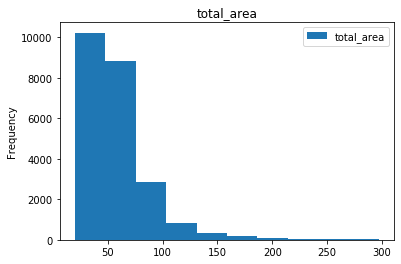

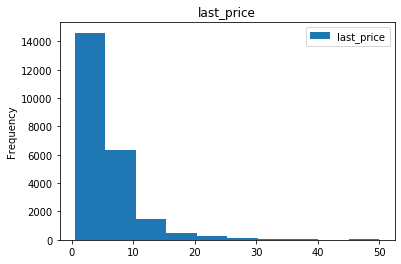

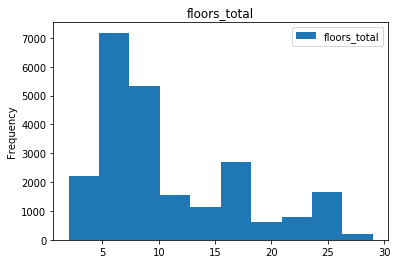

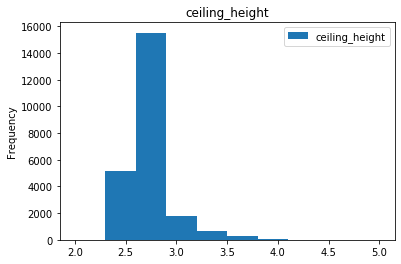

In [837]:
for element in lst:
    df.plot(y=element, kind='hist', bins=10, title=element, range=(min(df[element]),max(df[element])))

**Вывод**   
Большинство объявлений можно охарактеризовать следующими параметрами:   
- площадь < 100 м2
- цена до 15 млн руб
- этажность меньше 15
- стандартная высота потолков (до 3м)

### Анализ продолжительности продажи

Построим гистограмму и проанализируем описательные статистики.

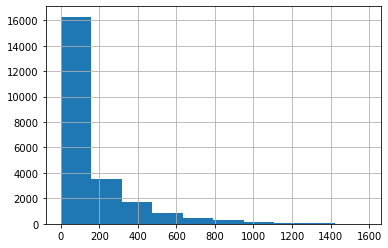

In [838]:
df['days_exposition'].hist(range=(min(df['days_exposition']),max(df['days_exposition'])))

In [839]:
df['days_exposition'].describe()

count    23409.000000
mean       162.244692
std        209.379915
min          1.000000
25%         45.000000
50%         74.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное значение длительности составляет 74 дня, при этом среднее - 162. Столь значительная разница возникает засчет объявлений, выставлявшихся 3+ лет. Почти 75% квартир были проданы в течение полугода - это можно считать приемлемым сроком продажи.<br>
<br>
По аналогии с пунктом 4.1 посчитаем кол-во аномальных значений: с продолжительностью больше 3х лет.

In [840]:
print('days_exposition > 1095', df.query('days_exposition > 1095')['days_exposition'].count())

days_exposition > 1095 166


Общее число аномальных наблюдений составляет менее 1%. Для получения более объективных результатов сократим выборку и построим обновленную гистограмму.

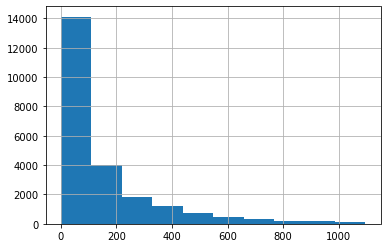

In [841]:
df = df.query('days_exposition <=1095')
df['days_exposition'].hist(range=(min(df['days_exposition']),max(df['days_exposition'])))

**Вывод**   
Подавляющее число квартир продается в течение полугода, однако при этом имеются объекты, находившиеся в продаже более 3х лет.

In [842]:
excl_share = (23699 - len(df))/23699
print(f'Доля выбросов, исключенных из выборки составила {excl_share:.1%}')

Доля выбросов, исключенных из выборки составила 1.9%


Далее можем приступить к анализу.

### Факторы, влияющие на стоимость

Проведем первичный анализ с помощью матрицы корреляции

In [843]:
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.779406,0.497413,-0.063952
total_area,0.779406,1.000000,0.791805,-0.100677
rooms,0.497413,0.791805,1.000000,-0.090983
cityCenters_nearest,-0.063952,-0.100677,-0.090983,1.000000


**Вывод**   
Коэффициент корреляции высок только по отношению к общей площади. Для оставшихся показателей ожидаемы знаки:
- чем больше комнат, тем выше цена
- чем дальше от центра, тем дешевле   
но при этом, сами коэффициенты по модулю далеки от 1, что свидетельствует о слабой связи.

Далее рассмотрим как меняется средняя стоимость цены в зависимости от этажа.

In [844]:
display(df.pivot_table(index='floor_type', values='last_price', aggfunc=['count','median','mean']))

,count,median,mean
,last_price,last_price,last_price
floor_type,,,
другой,17105,4.8,6.198414
первый,2844,3.9,4.640461
последний,3294,4.3,5.815101


**Вывод**   
- только 25% объявлений представлены на первом или последнем этаже.
- медианная и средняя цена первого этажа значительно ниже других этажностей.
- медианная и средняя цена последнего этажа также чуть ниже других этажностей.

Перейдем к анализу в зависимости от даты размещения объявления

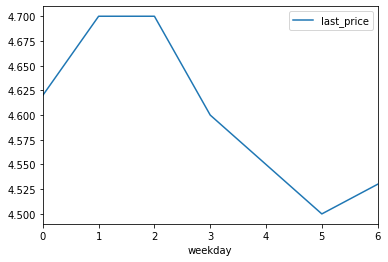

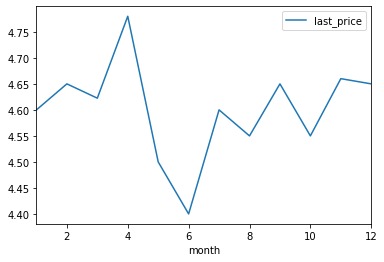

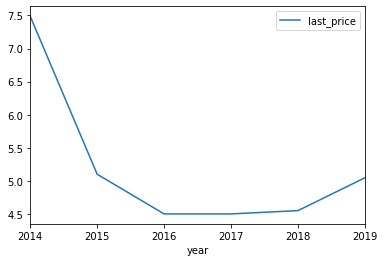

In [845]:
df_pivot_wd = df.pivot_table(index='weekday', values='last_price', aggfunc='median', )
df_pivot_wd.plot()
df_pivot_wd = df.pivot_table(index='month', values='last_price', aggfunc='median', )
df_pivot_wd.plot()
df_pivot_wd = df.pivot_table(index='year', values='last_price', aggfunc='median', )
df_pivot_wd.plot()

**Вывод**   
по медианным значениям цены:   
- выше для объявлений, выкладываемых в первой половине недели.
- самое низкое для майских и июньских.
- наблюдается интересная динамика по годам: снижение цены с 2014 по 2016 год (может быть связан с ростом кол-ва объявлений и усреднением цены) и постепенный рост, начиная с 2018 года.

### Рейтинг населенных пунктов

Найдем топ-10 локаций по числу объявлений.

In [846]:
df_rank = df.pivot_table(index='locality_name', values='price_sq_m', aggfunc=['count', 'mean'])

df_rank.columns = (['quantity', 'avg_price'])
df_rank = df_rank.sort_values('quantity', ascending=False).head(10)
display(df_rank)
display(df_rank.sort_values('avg_price', ascending=False))

,quantity,avg_price
locality_name,,
санкт-петербург,15366,112140.824142
мурино,586,86121.030190
кудрово,470,95315.256373
шушары,438,78613.779142
всеволожск,396,68674.623133
пушкин,362,103135.624111
колпино,336,75310.766883
парголово,326,90103.136772
гатчина,306,68757.678644


,quantity,avg_price
locality_name,,
санкт-петербург,15366,112140.824142
пушкин,362,103135.624111
кудрово,470,95315.256373
парголово,326,90103.136772
мурино,586,86121.030190
шушары,438,78613.779142
колпино,336,75310.766883
гатчина,306,68757.678644
всеволожск,396,68674.623133


**Вывод**   
Лидер по кол-ву объявлений и средней цене - Санкт-Петербург, самое дешевое жилье находится в Выборге.

### Анализ границы ЦАО

Выделим данные по Санкт-Петербургу и переведем расстояние от центра в км.

In [847]:
df_st_pete = df.query('locality_name == "санкт-петербург"')
df_st_pete['cityCenters_nearest'] = (df_st_pete['cityCenters_nearest'] / 1000).astype('int64')
df_st_pete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 23697
Data columns (total 29 columns):
total_images            15366 non-null int64
last_price              15366 non-null float64
total_area              15366 non-null float64
first_day_exposition    15366 non-null datetime64[ns]
rooms                   15366 non-null int64
ceiling_height          15366 non-null float64
floors_total            15366 non-null int64
living_area             15366 non-null float64
floor                   15366 non-null int64
is_apartment            15366 non-null bool
studio                  15366 non-null bool
open_plan               15366 non-null bool
kitchen_area            15366 non-null float64
balcony                 15366 non-null int64
locality_name           15366 non-null object
airports_nearest        15366 non-null float64
cityCenters_nearest     15366 non-null int64
parks_around3000        15366 non-null int64
parks_nearest           15366 non-null float64
ponds_around300

Посчитаем среднюю цену квартиры в зависимости от удаленности от центра.

,price_sq_m
cityCenters_nearest,
0,160409.340878
1,140186.879920
2,128719.671077
3,121456.036067
4,134134.953608


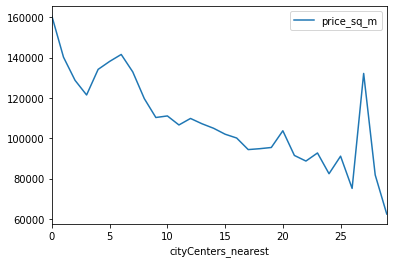

In [848]:
df_st_pete_km = df_st_pete.pivot_table(index='cityCenters_nearest', values='price_sq_m', aggfunc='mean')
df_st_pete_km.plot()
display(df_st_pete_km.head())

**Вывод**   
Начиная с 8го километра, цена за кв.м. значительно снижается => центром будем считать все, что находится в радиусе 0 - 7 км.

### Анализ рынка ЦАО

Выделим квартиры в ЦАО и рассчитаем описательные статистики для площади, цены, числа комнат, высоты потолков.

In [849]:
df_st_pete_center = df_st_pete.query('cityCenters_nearest <= 7')
df_st_pete_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3500.000000,3500.000000,3500.000000,3500.000000
mean,85.101431,11.432278,2.728000,2.915323
std,42.401748,7.905396,1.321558,0.341792
min,20.000000,1.600000,0.000000,2.000000
25%,55.000000,6.500000,2.000000,2.650000
50%,75.650000,8.879444,3.000000,2.800000
75%,103.400000,13.300000,3.000000,3.100000
max,297.500000,50.000000,14.000000,4.800000


**Вывод**   
Квартиры в цетре ожидаемо характеризуются большей площадью, числом комнат и ценой. Рассмотрим какие факторы влияют на стоимость.

In [850]:
df_st_pete_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.700714,0.430997,-0.066519
total_area,0.700714,1.000000,0.792032,-0.157462
rooms,0.430997,0.792032,1.000000,-0.206210
cityCenters_nearest,-0.066519,-0.157462,-0.206210,1.000000


**Вывод**   
Коэффициенты корреляции сопоставимы с общей выборкой. Единственное отличие - более низкие значения для удаленности от центра, что можно интерпретировать как практически одинаковую привлекательность всей площади центра.

In [851]:
display(df_st_pete_center.pivot_table(index='floor_type', values='last_price', aggfunc=['count','median','mean']))

,count,median,mean
,last_price,last_price,last_price
floor_type,,,
другой,2504,9.3,11.936330
первый,396,6.5,8.224060
последний,600,8.9,11.446124


**Вывод**   
В отличие от общей выборки, стоимость жилья на первом этаже в центре Санкт-Петербурга значительно ниже стоимости на других этажах.

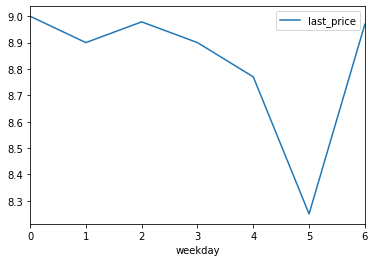

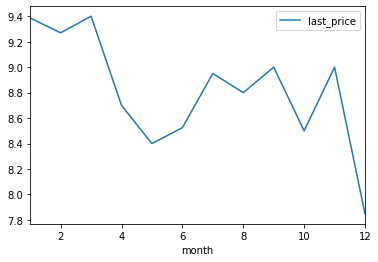

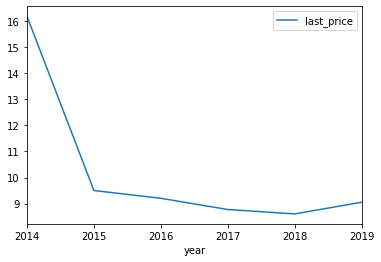

In [852]:
df_st_pete_center_wd = df_st_pete_center.pivot_table(index='weekday', values='last_price', aggfunc='median')
df_st_pete_center_wd.plot()
df_st_pete_center_wd = df_st_pete_center.pivot_table(index='month', values='last_price', aggfunc='median')
df_st_pete_center_wd.plot()
df_st_pete_center_wd = df_st_pete_center.pivot_table(index='year', values='last_price', aggfunc='median')
df_st_pete_center_wd.plot()

**Вывод**   
Зависимость цены от даты размещения сопоставима с логикой общей выборки за исключением:  
- стабильно высокая стоимость по дням недели, за исключением субботы.
- самое низкое медианное значеник для декабрьских.

## Общий вывод

По итогам исследования можно сделать следующие выводы:
- Первичный датасет содержит большое количество пропусков, которые должны быть адресованы поставщику данных
- Медианное время продажи объекта - 2.5 месяца, 75% объектов продаются в течение полугода.
- Самые дорогие объекты находятся в Санкт-Петербурге, самые дешевые - в Выборге.
- На стоимость объекта влияют площадь, количество комнат и удаленность от центра. В пределах 7 км от центра стоимость за кв.м. существенно выше.
- Стоимость объектов на первом и последнем этажах существенно ниже, чем на других. Стоимость жилья на первом этаже в ЦАО значительно ниже, чем в общей выборке.
- Стоимость объекта существенно не зависит от даты размещения.
- Для всей выборки справедлива тенденция по снижению средней стоимости объявления в 2014-2017 годах (связываю с ростом выборки) и по росту в период 2018-2019 годов.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод